# CS 210 -- Data Management For Data Science 

Final Project

Group Members: Nilay Tripathi, Nikhil Munagala, Arnav Borborah, Ajay Anand

NetIDs: 

In [46]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import math

## Information About The Data Set

Our data set is "Jobs And Salaries In Data Science", which gives information about salaries in careers related to data science (e.g. data scientist, data architect, machine learning engineer, etc.). The data set was obtained from Kaggle and can be found [here](https://www.kaggle.com/datasets/hummaamqaasim/jobs-in-data). 

Here is a brief summary of the meanings of the columns

- `work_year`: year the data was recorded.
- `job_title`: the specific title of the job.
- `job_category`: specialized category of the job (data science, analyst, machine learning etc.). More descriptive.
- `salary_currency`: currency the salary is reported in
- `salary`: annual salary, in the currency specified by the `salary_currency` column.
- `salary_in_usd`: salary converted to USD
- `employee_residence`: employee's country of residence
- `experience_level`: employee's experience level (entry-level, mid-level, etc)
- `employment_type`: full-time, part-time, contract work, etc.
- `work_setting`: working environment (remote, in-person, hybrid, etc)
- `company_location`: country of company
- `company_size`: relative size of companies (S for Small, M for Medium, etc)

Data science and its related fields play an extremely crucial role in today's society, where machine learning and artificial intelligence play increasingly important role. This data set includes data on time, allowing us to analyze trends in data science salary (and consequently, demand) over time. We can also use this data to learn how other information regarding experience, company size, and location impact salaries in data science and its related fields. Finally, there are tons of subfields within data science (like data analyst, data engineer, machine learning engineer, etc.) and as students who are interested in careers in data science, we would like to investigate how the subtle differences between these job titles impacts salary and future potential. 

## Preliminary Analysis Of Data

In this section, we import the data and try to learn about its columns and the types of data which are being stored.

In [5]:
dat = pd.read_csv("jobs_in_data.csv")

In [6]:
# Peek at the data 
dat.head()

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2023,Data DevOps Engineer,Data Engineering,EUR,88000,95012,Germany,Mid-level,Full-time,Hybrid,Germany,L
1,2023,Data Architect,Data Architecture and Modeling,USD,186000,186000,United States,Senior,Full-time,In-person,United States,M
2,2023,Data Architect,Data Architecture and Modeling,USD,81800,81800,United States,Senior,Full-time,In-person,United States,M
3,2023,Data Scientist,Data Science and Research,USD,212000,212000,United States,Senior,Full-time,In-person,United States,M
4,2023,Data Scientist,Data Science and Research,USD,93300,93300,United States,Senior,Full-time,In-person,United States,M


We first gather some preliminary information about the data and the types involved. For this purpose, we use the pandas `info()` function.

In [7]:
# Preliminary info 
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9355 entries, 0 to 9354
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           9355 non-null   int64 
 1   job_title           9355 non-null   object
 2   job_category        9355 non-null   object
 3   salary_currency     9355 non-null   object
 4   salary              9355 non-null   int64 
 5   salary_in_usd       9355 non-null   int64 
 6   employee_residence  9355 non-null   object
 7   experience_level    9355 non-null   object
 8   employment_type     9355 non-null   object
 9   work_setting        9355 non-null   object
 10  company_location    9355 non-null   object
 11  company_size        9355 non-null   object
dtypes: int64(3), object(9)
memory usage: 877.2+ KB


The first line indicates that there are 9,355 observations in the data frame. We see that the data records 12 features in the data. From the output below, we see that there are no NA values in our data set. When looking at data types, we see that only `work_year` and the variables recording salaries are numerical while everything else is a string type (denoted in pandas as type "object").

Next, we would like to investigate preliminary descriptive statistics to learn about the data set and begin to formulate hypotheses about it. We will use the pandas `describe()` function to obtain the preliminary statistics. 

Note that we only report the `salary_in_usd` variable: the statistics for `work_year` are meaningless (since this variable records time) and the `salary` variable records values with different currencies, making it inconsistent for comparisons.

In [8]:
# Preliminary statistics 
dat["salary_in_usd"].describe()

count      9355.000000
mean     150299.495564
std       63177.372024
min       15000.000000
25%      105700.000000
50%      143000.000000
75%      186723.000000
max      450000.000000
Name: salary_in_usd, dtype: float64

### Preliminary Investigation Of Categorical Types

Several variables in our data set are strings (labeled as type "object" by pandas). We need to be able to extract relevant information about the job title and category given the large variety in strings of this type. 

In [9]:
# Number of unique jobtitles and categories
dat["job_title"].nunique()

125

In [10]:
dat["job_category"].nunique()

10

In [11]:
dat["job_title"].unique()

array(['Data DevOps Engineer', 'Data Architect', 'Data Scientist',
       'Machine Learning Researcher', 'Data Engineer',
       'Machine Learning Engineer', 'Data Analyst', 'Analytics Engineer',
       'Applied Scientist', 'BI Developer',
       'Business Intelligence Engineer', 'Research Scientist',
       'Research Analyst', 'Research Engineer', 'Data Science Engineer',
       'Data Quality Analyst', 'Data Product Manager',
       'Machine Learning Scientist', 'AI Engineer', 'MLOps Engineer',
       'Deep Learning Engineer', 'Data Modeler', 'Data Product Owner',
       'Data Science Consultant', 'Business Intelligence Analyst',
       'AI Developer', 'Data Manager', 'ML Engineer',
       'Data Science Director', 'Head of Data', 'BI Analyst',
       'Data Management Analyst', 'Machine Learning Modeler',
       'Data Specialist', 'BI Data Analyst', 'Data Integration Engineer',
       'Business Intelligence Manager', 'Data Integration Specialist',
       'Data Science Practitioner', 'B

In [12]:
dat["job_category"].unique()

array(['Data Engineering', 'Data Architecture and Modeling',
       'Data Science and Research', 'Machine Learning and AI',
       'Data Analysis', 'Leadership and Management',
       'BI and Visualization', 'Data Quality and Operations',
       'Data Management and Strategy', 'Cloud and Database'], dtype=object)

### Preliminary Plotting

To quickly learn about the relationships among the numerical variable, we will make use of graphs. They can help us quickly assess the quality and behavior of our numerical variables. 

First, we want to analyze the distributions of the salary variable. We will restrict our attention to the `salary_in_usd` column, since the regular `salary` column records its values with inconsistent units. A box plot will show us the overall skewness of the data. 

We first want to assess the overall distribution of the salary (recorded in USD). To do this, we generate a box plot and histogram of the `salary_in_usd` variable. 

(array([ 507., 1631., 2719., 2195., 1356.,  588.,  242.,   77.,   34.,
           6.]),
 array([ 15000.,  58500., 102000., 145500., 189000., 232500., 276000.,
        319500., 363000., 406500., 450000.]),
 <BarContainer object of 10 artists>)

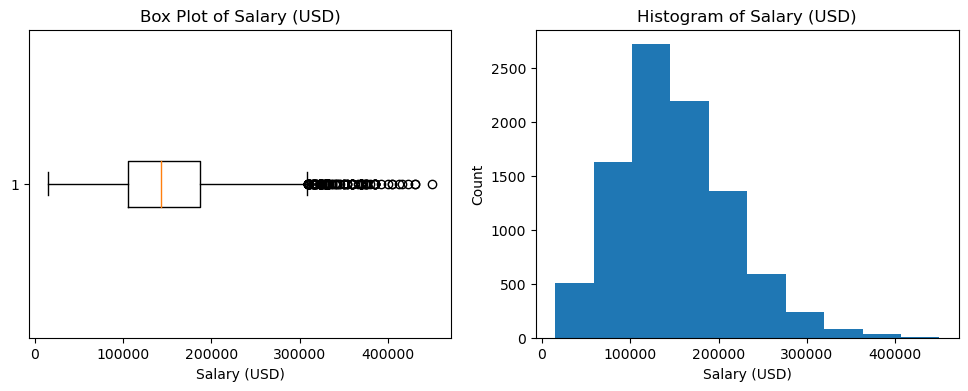

In [13]:
# Use a subplot to show both figures side by side for easy comparison.
sal_fig, x = plt.subplots(1,2, figsize = (12,4)) 

x[0].set_title("Box Plot of Salary (USD)")
x[0].set_xlabel("Salary (USD)")
x[0].boxplot(dat['salary_in_usd'], vert = False)

x[1].set_title("Histogram of Salary (USD)") 
x[1].set_xlabel("Salary (USD)") 
x[1].set_ylabel("Count")
x[1].hist(dat['salary_in_usd'])

The box plot indicates several potential outliers in the data (indicated by the circles on the right hand tail of the plot). This is also indicated on the histogram by the presence of a tail, indicating an overall right-skewed distribution. 

Both of these observations indicate that there are extreme values of salary on the higher end i.e. that there are a small subset of individuals who make substantially more than the median income for this field. Investigating this is an avenue for further investigation.

# Some Correlation Analysis

Between the various columns, we plot correlations to see if any particular patterns are interesting or worth exploring further. This exploratory analysis is shown below.

# Salary vs. Experience Level

The general expectation is that higher level positions will correspond to higher salaries. That is visualized below.

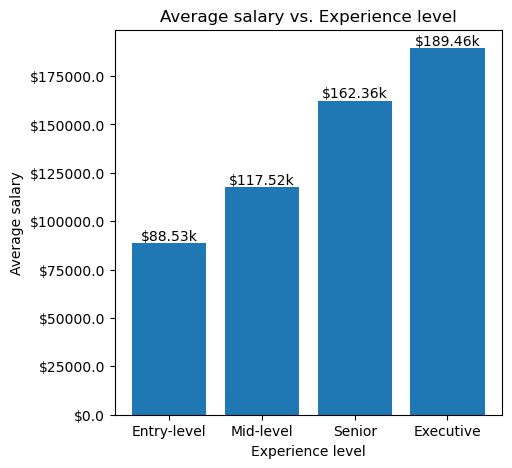

In [14]:
salaries_by_job_exp = dat.groupby('experience_level')['salary_in_usd'].mean().sort_values()

fig, ax = plt.subplots(figsize = (5,5))

bars = ax.bar(x=salaries_by_job_exp.index, height=salaries_by_job_exp.values)
ax.bar_label(bars, labels=[f'${it/1000:.2f}k' for it in salaries_by_job_exp])
ax.yaxis.set_major_formatter('${x}')
ax.set_xlabel('Experience level')
ax.set_ylabel('Average salary')
ax.set_title('Average salary vs. Experience level');

The data here clearly matches the expectations above. We can delve into this with more depth, focusing on salaries within a certain field, shown below:

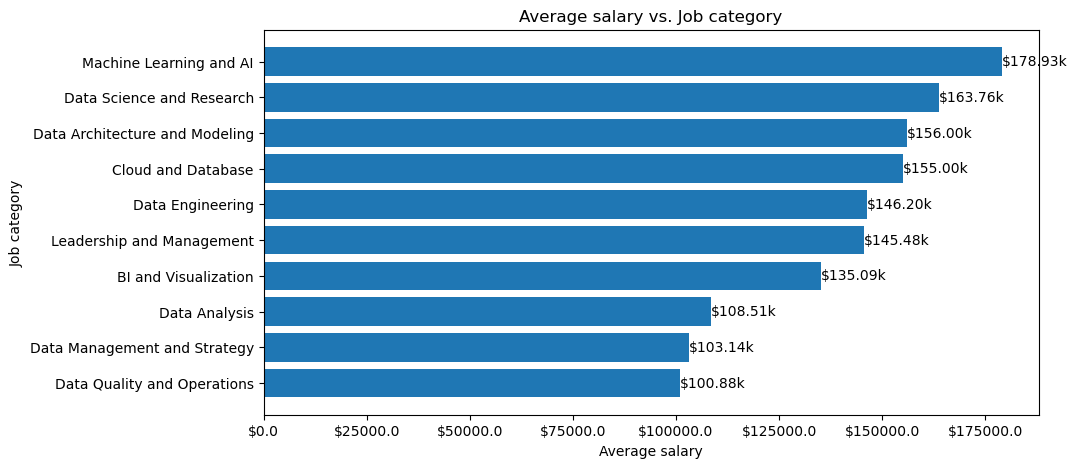

In [15]:
salaries_by_job_cat = dat.groupby('job_category')['salary_in_usd'].mean().sort_values()

fig, ax = plt.subplots(figsize = (10,5))

bars = ax.barh(y=salaries_by_job_cat.index, width=salaries_by_job_cat.values)
ax.bar_label(bars, labels=[f'${it/1000:.2f}k' for it in salaries_by_job_cat.values])
ax.xaxis.set_major_formatter('${x}')
ax.set_ylabel('Job category')
ax.set_xlabel('Average salary')
ax.set_title('Average salary vs. Job category');

The data seems to indicate that Machine Learning/AI/Data Science/Data Science Research jobs seem to pay the highest amounts on average.

We can combine both of these pieces to see the range of salaries for each field.

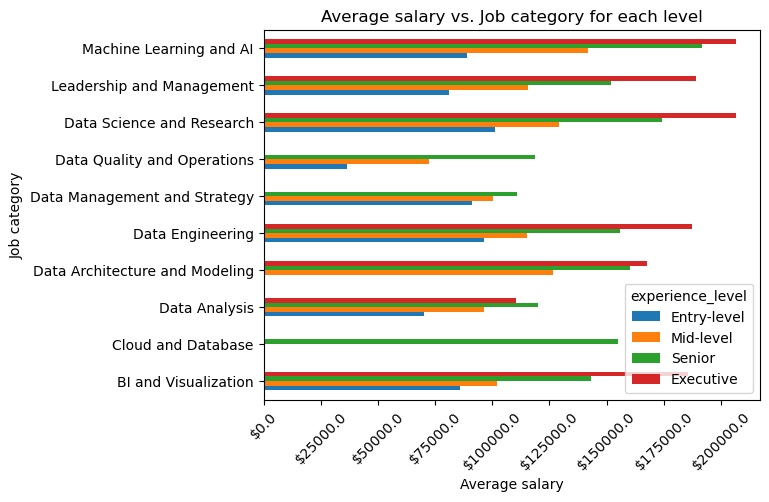

In [17]:
salaries_by_job_cat_and_level = dat.groupby(['job_category', 'experience_level'])['salary_in_usd'].mean()

reordered = salaries_by_job_cat_and_level.unstack()
reordered = reordered.reindex(columns=['Entry-level', 'Mid-level', 'Senior', 'Executive'])
ax = reordered.plot.barh()
ax.xaxis.set_major_formatter('${x}')
ax.set_ylabel('Job category')
ax.set_xlabel('Average salary')
plt.xticks(rotation=45)
ax.set_title('Average salary vs. Job category for each level');

Within each job category, for the most part we can see that higher job levels lead to higher salaries. There is one visible exception for the data analysis jobs, where the mean senior salary is higher than that of the executives. This may be potentially be due to outliers.

Next, we will see whether the title of the position has any general correlation with the salary for a certain field. To understand this, we will use regex to extract the defining name of any position and plot the average salary when grouping by that word.

From the original list of unique jobs, we have the following:

In [19]:
for job in dat['job_title'].unique():
    print(job)

Data DevOps Engineer
Data Architect
Data Scientist
Machine Learning Researcher
Data Engineer
Machine Learning Engineer
Data Analyst
Analytics Engineer
Applied Scientist
BI Developer
Business Intelligence Engineer
Research Scientist
Research Analyst
Research Engineer
Data Science Engineer
Data Quality Analyst
Data Product Manager
Machine Learning Scientist
AI Engineer
MLOps Engineer
Deep Learning Engineer
Data Modeler
Data Product Owner
Data Science Consultant
Business Intelligence Analyst
AI Developer
Data Manager
ML Engineer
Data Science Director
Head of Data
BI Analyst
Data Management Analyst
Machine Learning Modeler
Data Specialist
BI Data Analyst
Data Integration Engineer
Business Intelligence Manager
Data Integration Specialist
Data Science Practitioner
Business Intelligence Developer
AI Research Engineer
Data Lead
Data Management Specialist
AI Architect
Data Science Manager
Data Strategist
Business Intelligence Specialist
Machine Learning Infrastructure Engineer
Data Quality Engi

Using [regex101.com](https://regex101.com/r/HiEg0g/1), we created the following regex to extract the position from each job title:

```python
reg = r"((Engineer|Architect|Scientist|Researcher|Analyst|Modeler|Owner|Consultant|Developer|Specialist|Strategist|Lead|Programmer|Modeller|Technician|Practitioner)$)|(Manager|Head|Director)"
```

With this regex, we can create a new dataframe with the columns relevant to us. The regex is then used to create a new column with the position corresponding to each job.

In [21]:
position_dat = dat[["job_title", "salary_in_usd", "experience_level"]].copy()

reg = r"(Engineer$|Architect$|Scientist$|Researcher$|Analyst$|Modeler$|Owner$|Consultant$|Developer$|Specialist$|Strategist$|Lead$|Programmer$|Modeller$|Technician$|Practitioner$|Manager|Head|Director)"
position_dat['job_position'] = dat['job_title'].str.extract(reg)

position_dat

,job_title,salary_in_usd,experience_level,job_position
0,Data DevOps Engineer,95012,Mid-level,Engineer
1,Data Architect,186000,Senior,Architect
2,Data Architect,81800,Senior,Architect
3,Data Scientist,212000,Senior,Scientist
4,Data Scientist,93300,Senior,Scientist
...,...,...,...,...
9350,Data Specialist,165000,Senior,Specialist
9351,Data Scientist,412000,Senior,Scientist
9352,Principal Data Scientist,151000,Mid-level,Scientist
9353,Data Scientist,105000,Entry-level,Scientist


We can then group by this new job position and inspect the output

In [23]:
salaries_by_job_position = position_dat.groupby('job_position')['salary_in_usd']
salaries_by_job_position.describe()

,count,mean,std,min,25%,50%,75%,max
job_position,,,,,,,,
Analyst,1613.0,108598.092374,43916.964440,15000.0,78000.00,105000.0,135000.00,430967.0
Architect,229.0,169040.737991,60073.769544,52500.0,125600.00,165000.0,200000.00,376080.0
Consultant,46.0,103985.434783,38697.862424,21000.0,76833.00,108825.0,128100.00,189750.0
Developer,120.0,116766.791667,51278.161956,15000.0,76735.50,110000.0,140000.00,275000.0
Director,34.0,221281.941176,72362.144112,57786.0,185920.00,212000.0,249825.00,375500.0
Engineer,4090.0,159135.023227,62873.307651,15966.0,115872.50,152000.0,200000.00,430640.0
Head,46.0,207978.217391,78725.393790,31520.0,146650.00,204750.0,269600.00,330000.0
Lead,40.0,181054.125000,77908.919865,38000.0,129825.00,180000.0,225000.00,405000.0
Manager,280.0,146943.750000,61706.262243,45600.0,110000.00,134118.0,174250.00,399880.0


Clearly, some job positions (Engineer, Scientist) have many more values compared to the others. Keeping this in mind, we use two different bar colors for groups where the number of jobs is under a specified threshold.

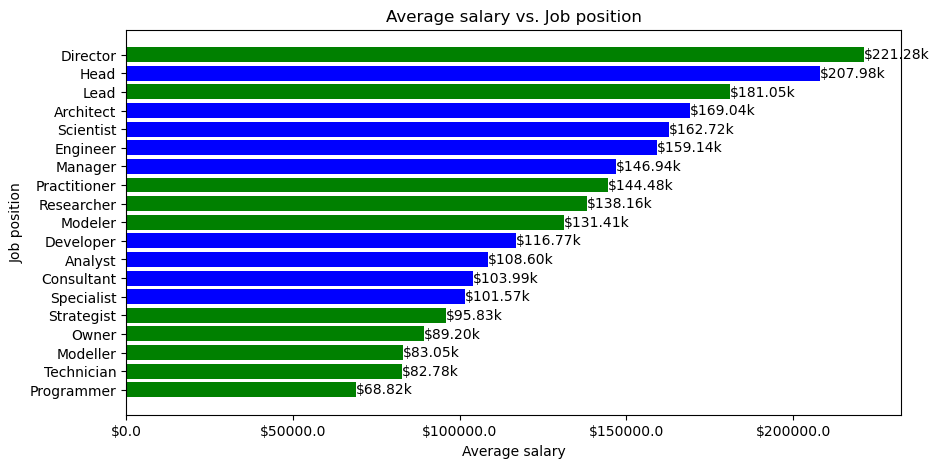

In [25]:
threshold = 40

to_graph = salaries_by_job_position.mean().sort_values()

fig, ax = plt.subplots(figsize = (10,5))

bars = ax.barh(y=to_graph.index, width=to_graph.values, color=["blue" if salaries_by_job_position.count()[val] > threshold else "green" for val in to_graph.index])
ax.bar_label(bars, labels=[f'${it/1000:.2f}k' for it in to_graph.values])
ax.xaxis.set_major_formatter('${x}')
ax.set_ylabel('Job position')
ax.set_xlabel('Average salary')
ax.set_title('Average salary vs. Job position');

In the graph above, the bars that are below the threshold are colored green. Generally though, Director/Head/Lead positions seem to have the highest salaries.

## Filtering Out Common Keywords

We would like to see how the job title impacts the salary in the outlier group, and compare it to the no outliers group. However, there are many unique job titles and it would be impractical to search through all of them. 

Instead, we search for specific "buzz words" in the job titles. We expect words like "data", "machine learing", "AI", and "artifical intelligence" to be in all the job titles. We suspect, however, that modifiers like "engineer", "architect", "scientist", "developer", etc. will have an impact on the salary. Thus, we simply filter common words out and leave only these "buzz words".

In [26]:
# Common words to filter out 
words_rem = ["machine", "learning", "ml", "data", "ai", "artificial",  "intelligence", "analytics", "deep", "of"]

In [27]:
# Remove the words from the list case insensitive
def remove_common_words (title):
    words = ''
    for word in title.split():
        words = ','.join([i for i in title.split() if i.lower() not in words_rem])
    return words

In [28]:
dat["job_title_keywords"] = dat["job_title"].apply(remove_common_words)

## Analysis Of Outliers

As indicated above, there are several outliers present in the data set. We would like to see what patterns lead to such a high salary. 

We will first gather all the outliers, which are computed using the 1.5*IQR rule. The interquartile range (IQR) is first computed as $$\text{IQR} = \text{upper quartile} - \text{lower quartile}$$The cutoff for an outlier is then given as $$\text{min} = \text{upper quartile} + 1.5 \times \text{IQR}$$

In [30]:
# Use the 1.5 * IQR to get the outliers 
lower_quartile = np.quantile(dat["salary_in_usd"], 0.25)
upper_quartile = np.quantile(dat["salary_in_usd"], 0.75) 
IQR = upper_quartile - lower_quartile

In [31]:
# Lower cutoff for the outliers 
low = upper_quartile + 1.5 * IQR 

In [32]:
# Get the outliers from the data set 
outliers = dat[dat["salary_in_usd"] > low]
wo_outliers = dat[dat["salary_in_usd"] <= low]

In [33]:
# Add a row in the table for whether the data point is an outlier or not
dat["outlier"] = dat["salary_in_usd"] > low

We will now gather some basic information on the outliers using the `describe()` function from pandas.

In [34]:
outliers["salary_in_usd"].describe()

count       158.000000
mean     341917.436709
std       30203.875365
min      309000.000000
25%      318475.000000
50%      331640.000000
75%      364222.500000
max      450000.000000
Name: salary_in_usd, dtype: float64

In [35]:
wo_outliers["salary_in_usd"].describe()

count      9197.000000
mean     147007.592258
std       58332.569893
min       15000.000000
25%      105000.000000
50%      142200.000000
75%      185000.000000
max      308000.000000
Name: salary_in_usd, dtype: float64

### A Brief Lexical Comparison Between The Two Sets

As stated above, we would like to see if we can observe common trends among salary from the job title alone. We conduct a lexical comparison, where we try to isolate specific keywords in the job title and see if there are patterns that explain the high salaries in the outlier set.

In [36]:
# We now want to count the number of each word in the outlier set and the no outlier set. 
outlier_words = {} 
no_outlier_words = {}

In [37]:
for words in outliers["job_title_keywords"]:
    word_list = words.split(',')
    for word in word_list:
        if word not in outlier_words:
            outlier_words[word] = 1 
        else:
            outlier_words[word] += 1
            
for words in wo_outliers["job_title_keywords"]:
    word_list = words.split(',')
    for word in word_list:
        if word not in no_outlier_words:
            no_outlier_words[word] = 1 
        else:
            no_outlier_words[word] += 1

We now use the counts in the dictionary to create a data frame in which we compare the counts of each word in the outlier dictionaries. 

In [38]:
word_counts_outliers = pd.DataFrame.from_dict(outlier_words, orient="index", columns=["word_count_outlier"]) 
word_counts_outliers["word"] = word_counts_outliers.index
word_counts_outliers.head()

,word_count_outlier,word
Engineer,78,Engineer
Research,17,Research
Scientist,51,Scientist
Architect,8,Architect
Director,5,Director


In [39]:
word_counts_no_outliers = pd.DataFrame.from_dict(no_outlier_words, orient="index", columns=["word_count_no_outlier"]) 
word_counts_no_outliers["word"] = word_counts_no_outliers.index
word_counts_no_outliers.head()

,word_count_no_outlier,word
DevOps,2,DevOps
Engineer,4012,Engineer
Architect,221,Architect
Scientist,2656,Scientist
Researcher,18,Researcher


We now join the two word count data frames into one so we can easily compare them.

In [40]:
# Join the two data frames together using the word variable
word_counts = pd.concat([word_counts_no_outliers, word_counts_outliers], axis = 1, join = "outer", ignore_index=True)

# Drop the last column
word_counts = word_counts.drop([3], axis = 1) 

# Rename columns 
word_counts = word_counts.rename(columns = {0 : "no_outlier_count", 1 : "word", 2 : "outlier_count"})

# Fill NAs with 0 to indicate no presence 
word_counts = word_counts.fillna(0) 
word_counts.head()

,no_outlier_count,word,outlier_count
DevOps,2.0,DevOps,0.0
Engineer,4012.0,Engineer,78.0
Architect,221.0,Architect,8.0
Scientist,2656.0,Scientist,51.0
Researcher,18.0,Researcher,0.0


We notice that there are sufficiently more non-outliers than outliers, so we cannot simply do a comparison by numbers. It is more accurate to compare proportions. We compute the proportion of titles which contain each word.

In [41]:
word_counts["outlier_prop"] = word_counts["outlier_count"]/(outliers.shape[0])
word_counts["no_outlier_prop"] = word_counts["no_outlier_count"]/(wo_outliers.shape[0])
word_counts["prop_diff"] = word_counts["outlier_prop"] - word_counts["no_outlier_prop"]
word_counts.head()

,no_outlier_count,word,outlier_count,outlier_prop,no_outlier_prop,prop_diff
DevOps,2.0,DevOps,0.0,0.000000,0.000217,-0.000217
Engineer,4012.0,Engineer,78.0,0.493671,0.436229,0.057442
Architect,221.0,Architect,8.0,0.050633,0.024030,0.026603
Scientist,2656.0,Scientist,51.0,0.322785,0.288790,0.033995
Researcher,18.0,Researcher,0.0,0.000000,0.001957,-0.001957


In the code above, we calculate the difference in the proportion between the proportion in the outlier set and no outlier sets, with negative values indicating a larger percentage in the no outlier set. If we sort the data frame by the difference in proportion, we can see the words which have the most drastic difference among the outliers and no outlier set.

In [43]:
top_words = word_counts.sort_values(by = ['prop_diff'], key = abs, ascending=False).head(10)
top_words

,no_outlier_count,word,outlier_count,outlier_prop,no_outlier_prop,prop_diff
Analyst,1609.0,Analyst,4.0,0.025316,0.174948,-0.149632
Research,443.0,Research,17.0,0.107595,0.048168,0.059427
Engineer,4012.0,Engineer,78.0,0.493671,0.436229,0.057442
Head,39.0,Head,7.0,0.044304,0.004241,0.040063
Scientist,2656.0,Scientist,51.0,0.322785,0.288790,0.033995
Science,213.0,Science,9.0,0.056962,0.023160,0.033802
Applied,288.0,Applied,10.0,0.063291,0.031315,0.031977
Director,29.0,Director,5.0,0.031646,0.003153,0.028492
Architect,221.0,Architect,8.0,0.050633,0.024030,0.026603
Business,241.0,Business,0.0,0.000000,0.026204,-0.026204


Recall that negative values correspond to a larger proportion in the no outlier set. From the table above, we see that the word "analyst" is more prevalent among job titles in the no outlier set than the outlier set, implying that jobs with "analyst" in the title are likely more entry-level positions. 

On the contrary, we see that words like "research", "engineer", and "head" are more prevalent among the outlier salaries and thus lead to larger salaries. This matches our prediction, since these are more specalized roles that require more experience and would cosnequently yield a higher salary. The word "head" also denotes a more senior position, which would indicate more pay. 

Interestingly, this analysis does not reveal any large difference between roles with specific certification requirelemts (i.e. like AWS positions). We thought that these extra qualifications would cause a higher salary, but this is not supported by the data. A possible reason could be the relatively few job titles with these roles, meaning there might not be enough data to reach an accurate conclusion on this aspect.

Here, we assess the trends in experience level on salary.

In [44]:
# First, assess the experience level of the position. 
print("Unique experience levels in the no outlier set:", wo_outliers["experience_level"].unique())
print("Unique experience levels in the outlier set:", outliers["experience_level"].unique())

Unique experience levels in the no outlier set: ['Mid-level' 'Senior' 'Executive' 'Entry-level']
Unique experience levels in the outlier set: ['Senior' 'Mid-level' 'Executive']


# Hypothesis Testing

Analyzing patterns between samples of key interest allows us to come up with better hypotheses. The significance of this goes far, since as humans we can make conclusions for high-demand Data Science jobs around the world. This can then leverage us to find the right jobs that align with our interests. 

Situation 1

Null Hypothesis: The average salary for a data scientist is the same as the average salary for a data engineer. 

Alternative Hypothesis: The average salary for a data scientist is greater than the average salary for a data engineer. 

In [50]:
data_scientists = dat[dat['job_title'] == 'Data Scientist']
data_engineers = dat[dat['job_title'] == 'Data Engineer']

salaryDSMean = data_scientists['salary_in_usd'].mean()
salaryDEMean = data_engineers['salary_in_usd'].mean()

print(salaryDSMean)#Mean for Data Scientists
print(salaryDEMean)#Mean for Data Engineers

salaryDSsd = data_scientists['salary_in_usd'].std()
salaryDEsd = data_engineers['salary_in_usd'].std()

print(salaryDSsd)#Standard Deviation for Data Scientists
print(salaryDEsd)#Standard Deviation for Data Engineers

DSlen = len(data_scientists)
DElen = len(data_engineers)

print(DSlen)#amount of Data Scientists
print(DElen)#amount of Data Engineers

#Because n is greater than 30, the distribution is approximately normal. This means that I can use a z-test. 

sdBothSamples = math.sqrt((salaryDSsd ** 2)/DSlen + (salaryDEsd ** 2)/DElen)
    
print(sdBothSamples)

zscore = (salaryDSMean-salaryDEMean)/sdBothSamples
print(zscore)

#Right-tailed test, so pvalue = 1-pnorm(zscore)
pvalue = 1-1

156681.01508295626
146620.09521640092
59914.37245928487
56643.63999597138
1989
2195
1807.3528897863362
5.566660458735723


Because the p-value is less than 0.05, I reject the null hypothesis. There is sufficient evidence suggesting that the average salary for a data scientist is greater than the average salary for a data engineer. 

Situation 2

Null Hypothesis: The average salary for data scientists in a large company size is same as the average salary for data scinetists in medium company size. 

Alternative Hypothesis: The average salary for data scientists in a large company size is lower than the average salary for data scientists in medium company size. 

In [49]:
DSL = dat[(dat['job_title'] == 'Data Scientist') & (dat['company_size'] == 'L')]
DSM = dat[(dat['job_title'] == 'Data Scientist') & (dat['company_size'] == 'M')]

#print(DSL)
#print(DSS)

salaryDSLMean = DSL['salary_in_usd'].mean()
salaryDSMMean = DSM['salary_in_usd'].mean()

print(salaryDSLMean)
print(salaryDSMMean)

salaryDSLsd = DSL['salary_in_usd'].std()
salaryDSMsd = DSM['salary_in_usd'].std()

print(salaryDSLsd)
print(salaryDSMsd)

DSLlen = len(DSL)
DSMlen = len(DSM)

print(DSLlen)
print(DSMlen)

#Because n is greater than 30, the distribution is approximately normal. This means that I can use a z-test. 

sdBothSamples = math.sqrt((salaryDSLsd ** 2)/DSLlen + (salaryDSMsd ** 2)/DSMlen)
    
print(sdBothSamples)

zscore = (salaryDSLMean-salaryDSMMean)/sdBothSamples
print(zscore)

#Left-tailed test, so pvalue = pnorm(zscore)
pvalue = 3.11773e-11

118651.84545454546
160162.61804430038
65063.47707441245
58166.49830246142
110
1851
6349.172476181226
-6.537981563027565


Because the p-value is less than 0.05, I reject the null hypothesis. There is sufficient evidence suggesting that the average salary for data scientists in a large company size is lower than the average salary for data scientists in medium company size. 

# Bayesian Analysis

# Introduction

In today's job market in the Data Science industry, the chances of being hired are very low. This is where conditional probability is powerful, because it is used to derive the chances of the availability of different job positions/openings given certain beliefs/conditions in the Data Science market. This allows us to make more informed decisions about what Data Science jobs in today's market to look for. This is why we will be performing some Bayesian Analysis on the dataset using different situations.

We will perform bayesian analysis in the following situation.

Find the odds that you make over $150,000 in USD given that you are a Data 
Engineer. To rewrite this in terms of conditional probability, we use Bayes' Theorem below:

P(A|B) = P(B|A) * P(A) / P(B)

A = Belief, B = Observation

To identify the belief and observation in the above conditional probability
problem, we first need to identify what these terms mean. The belief is what we are trying to find out while the observation is what we are given (evidence).

In this case, A(Belief) = Salary is greater than $150,000 in USD and B(Observation) = You are a Data Engineer.

Going back to Bayes' Theorem to calculate conditional probability, there are 4 parts to Bayes Theorem.
1. P(B|A) = Likelihood probability
2. P(A) = Prior Probability
3. P(B) = Marginalization (Prob of observation)
4. P(A|B) = Posterior/Conditional Probability

We will calculate all of them (in terms of ratios or probability) to help us derive the conditional probability.

To compute the posterior conditional probability using Bayes' theorem above, we first need to find the number of jobs that have a salary greater than $150,000.

In [53]:
salary_greater = dat.loc[dat['salary_in_usd'] > 150000]
salary_greater_length = len(salary_greater.index)
salary_greater_length

4150

In [54]:
# Get the total number of salaries (aka, the number of records in the dataset)
num_salaries = len(dat.index)
num_salaries

9355

In [55]:
p_a = salary_greater_length/num_salaries
p_a

0.4436130411544629

This is a huge percentage of number of jobs around the world that offer yearly salaries greater than $150,000 in USD.
Now that we found the prior probability, we can calculate the probability of being a Data Engineer, P(B).

In [56]:
data_engineer = dat[dat['job_title'] == 'Data Engineer']
data_engineer_length = len(data_engineer.index)
p_b = data_engineer_length / num_salaries
p_b 

0.2346338856226617

From the dataset of Data Science jobs around the world, the probability of being a Data Engineer is strictly high compared to the vast amount of job titles there are.

Now, let's derive the likelihood probability. We will find the likelihood probability using the likelihood ratio, which is using odds. In order to find that, we need the true positive and the false positive ratios:
1. True Positive = P(B|A) = Probability of being a data engineer given that you are making over 80k a year.
2. False Positive = P(B|¬A) =  Probability of being a data engineer given that you are making at most 80k a year.

The true and false positives are computed in the following code cells.

In [57]:
df1 = dat.loc[(dat['job_title'] == 'Data Engineer') & (dat['salary_in_usd'] > 150000)]
true_positive = len(df1.index) / salary_greater_length
df2 = dat.loc[(dat['job_title'] == 'Data Engineer') & (dat['salary_in_usd'] <= 150000)]
false_positive = len(df2.index) / (num_salaries - salary_greater_length)

In [58]:
true_positive

0.22216867469879517

In [59]:
false_positive

0.24457252641690683

Now we can compute the likelihood ratio, which is the ratio of the true positive and false positive.

Basically, we are finding the odds of P(B|A).

In [60]:
likelihood_ratio = true_positive / false_positive
likelihood_ratio

0.9083958773034005

Next, we calculate the prior odds to find the posterior odds, which are the odds for 
posterior probability. We will later convert it to conditional probability to divide by the marginalization.

Odds of A = P(A) / 1 - P(A)

In [61]:
p_a_odds = p_a / (1 - p_a)
p_a_odds

0.7973102785782902

Once we have found the prior odds, we can now find the posterior odds, which is computed
as likelihood ratio * prior odds.

In [62]:
post_odds = likelihood_ratio * p_a_odds
post_odds

0.7242733699921446

Since we didn't use marginalization, P(B), to find the posterior odds, we didn't need that in the equation after all. Instead, we can convert the posterior odds to conditional probability. 

In [63]:
cond_prob = post_odds / (post_odds + 1)
cond_prob

0.4200455580865604

The probability of having a yearly salary over $150,000 in USD given that you 
are a Data Engineer is 42%.

The following codecell verifies this, using the equation to find P(A|B).

P(A|B) = P(A & B) / P(B)

In [64]:
#df1 = Dataframe of data engineering jobs that have a yearly salary of over $150,000. 
p_a_given_b = (len(df1.index) / num_salaries) / p_b
p_a_given_b

0.42004555808656036

# Conclusion

The findings and analysis from the dataset presented in this notebook proved to be a valuable asset in determining the future of Data Science jobs around the world. The rich visual analysis made it easier to differentiate certain Data Science jobs that are high in demand based on certain factors/features. In addition, performing Hypothesis Testing and Bayesian Analysis gave proper statistical analysis to assess the performance of top-demand jobs based on salaries. In these hard times the Data Science job market has become very saturated, but hopefully this analysis should provide some hope that there are plenty of opportunities in the Data Science field around the world. 